<a href="https://colab.research.google.com/github/Venture-Coding/SUNY-Buffalo-ML-and-self-learning/blob/main/Regression/Random_Forest_Classifier_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
# read data
bank = pd.read_csv("bank_train.csv")
X = bank.drop(['purchased'], axis=1)
y = bank['purchased']

print(y.head())
X.head()

0    1
1    0
2    0
3    0
4    0
Name: purchased, dtype: int64


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,id,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,41,679,2,999,0,1.1,93.994,-36.4,4.857,5191.0,1088,7,1,3,1,2,0,1,6,1,1
1,32,296,2,999,0,-0.1,93.200,-42.0,4.153,5195.8,4045,1,1,2,0,0,0,1,7,3,1
2,44,230,1,999,0,-1.8,93.075,-47.1,1.479,5099.1,492,4,0,5,0,2,0,0,0,0,1
3,38,119,1,999,0,-1.8,92.843,-50.0,1.757,5099.1,3563,9,1,4,0,0,0,0,5,2,1
4,60,259,1,999,0,1.4,93.444,-36.1,4.962,5228.1,1828,0,1,2,0,2,0,0,1,2,1


In [5]:
# read train, test data
bank_train, bank_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size = 0.2)
  
print(bank_train.head())
print(bank_test.head())

      age  duration  campaign  pdays  ...  contact  month  day_of_week  poutcome
1303   33      1176         1    999  ...        0      0            4         1
886    58        70         1    999  ...        0      7            1         1
149    29        14         5    999  ...        0      1            0         1
1311   34        77         4    999  ...        0      6            4         1
2085   45        10        16    999  ...        1      4            2         1

[5 rows x 21 columns]
      age  duration  campaign  pdays  ...  contact  month  day_of_week  poutcome
983    58        79         2    999  ...        0      4            3         1
33     45       226         1    999  ...        0      1            1         1
2047   45       527         1    999  ...        0      7            1         1
2427   59       422         3    999  ...        1      6            2         1
578    34       145         1    999  ...        0      1            1         1

[5 r

In [6]:
print(bank_train.columns)
x_train = bank_train

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'id',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [7]:
rf = RandomForestClassifier(max_depth=4, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
predictions = rf.predict(bank_test)
print(predictions[:5])


[0 0 0 0 0]


In [10]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(accuracy_score(y_test,predictions))

0.9059180576631259


In [11]:
#####################################################
## Implement GridSearchCV to find optimal max_depth
#####################################################

# specify number of folds for k-fold CV
n_folds = 5 

# specify range of the hyperparameter max_depth 
parameters = {
    'max_depth': [4,8,12,20],
    'min_samples_leaf': [100],
    'min_samples_split': [200],
    'n_estimators': [100], 
    'max_features': [8,10]
} 

# instantiate the model
rf1 = RandomForestClassifier()

# fit tree on training data
rf1 = GridSearchCV(rf1, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score = True)

# fit the rf model 
rf1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [12]:
print('We can get accuracy of',rf1.best_score_,'using',rf1.best_params_)

We can get accuracy of 0.8945374044045771 using {'max_depth': 4, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [13]:
# store scores/results of GridSearch CV in a df
scores = rf1.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.253007,0.004167,0.012758,0.000362,4,8,100,200,100,"{'max_depth': 4, 'max_features': 8, 'min_sampl...",0.893939,0.893738,0.893738,0.895636,0.895636,0.894537,0.0009,1,0.894687,0.894737,0.894737,0.894263,0.894263,0.894537,0.000225
1,0.275845,0.007802,0.012412,0.000453,4,10,100,200,100,"{'max_depth': 4, 'max_features': 10, 'min_samp...",0.893939,0.893738,0.893738,0.895636,0.895636,0.894537,0.0009,1,0.894687,0.894737,0.894737,0.894263,0.894263,0.894537,0.000225
2,0.269885,0.009775,0.013563,0.002058,8,8,100,200,100,"{'max_depth': 8, 'max_features': 8, 'min_sampl...",0.893939,0.893738,0.893738,0.895636,0.895636,0.894537,0.0009,1,0.894687,0.894737,0.894737,0.894263,0.894263,0.894537,0.000225
3,0.290968,0.007273,0.012452,0.000268,8,10,100,200,100,"{'max_depth': 8, 'max_features': 10, 'min_samp...",0.893939,0.893738,0.893738,0.895636,0.895636,0.894537,0.0009,1,0.894687,0.894737,0.894737,0.894263,0.894263,0.894537,0.000225
4,0.264483,0.006310,0.014585,0.002880,12,8,100,200,100,"{'max_depth': 12, 'max_features': 8, 'min_samp...",0.893939,0.893738,0.893738,0.895636,0.895636,0.894537,0.0009,1,0.894687,0.894737,0.894737,0.894263,0.894263,0.894537,0.000225


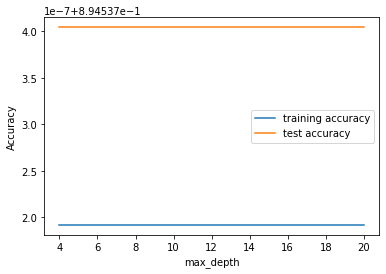

In [26]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

It is seen that for this data we don't find much improvement in the accuracy between the different max_Depth used.